In [37]:
#Regression - House sale price prediction
import os
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
import numpy as np
import io, pydotplus
import math
import seaborn as sns


In [38]:
#returns current working directory
os.getcwd()
#changes working directory
os.chdir("C:/Users/ADITHYA CHITTURI/Downloads/houseprice")

house_train = pd.read_csv("train.csv")
house_train.shape
house_train.info()

house_test = pd.read_csv("test.csv")
house_test.shape
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
house_train['ExterQual']

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

In [40]:
#Concatenate train and test data and we will seperate before applying the model
house_data = pd.concat([house_train, house_test],ignore_index=True)
house_data.drop(["Id","SalePrice"], axis=1, inplace=True)
house_data.shape
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [41]:
house_data['ExterQual']

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
2914    TA
2915    TA
2916    TA
2917    TA
2918    TA
Name: ExterQual, Length: 2919, dtype: object

In [42]:


#convert numerical columns to categorical type              
house_data['MSSubClass'] = house_data['MSSubClass'].astype('category')
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [43]:
house_data['ExterQual']


0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
2914    TA
2915    TA
2916    TA
2917    TA
2918    TA
Name: ExterQual, Length: 2919, dtype: object

In [44]:

#convert categorical columns to numeric type
ordinal_features1 = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "GarageQual", "GarageCond", "PoolQC", "FireplaceQu", "KitchenQual", "HeatingQC"]
#ordinal_features1 = [col for col in house_train if 'TA' in list(house_train[col])]
quality_dict = {None: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}


for feature in ordinal_features1:
    null_idx = house_data[feature].isnull()
    house_data.loc[null_idx, feature] = None 
    house_data[feature] = house_data[feature].map(quality_dict)
    
   


In [45]:
house_data['ExterQual']

0       4
1       3
2       4
3       3
4       4
       ..
2914    3
2915    3
2916    3
2917    3
2918    3
Name: ExterQual, Length: 2919, dtype: int64

In [46]:

#==============================================================================
# house_data.head(100)
# house_data['BsmtCond']
#==============================================================================

#handle missing data columns
#See for how many rows the data is missing!
total_missing = house_data.isnull().sum()
total_missing

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [36]:

#for just dry run, go ahead and delete where the data is missing.
#This is just for a dry run to understand the next steps.
#in reality, we have impute these values
to_delete = total_missing[total_missing>0]
house_data.drop(list(to_delete.index), axis=1, inplace=True)
house_data.shape




total_missing = house_data.isnull().sum()
total_missing

MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
dtype: int64

In [54]:

#Numerical columns.. include=['number']
numeric_cols = house_data.select_dtypes(include=['number']).columns
print(numeric_cols)
#Categorical columns .. exclude = ['number'])
cat_cols = house_data.select_dtypes(exclude = ['number']).columns


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [53]:
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:


#Automated to get all category columns and use one hot encoding instead of writing each and every column
house_data1 = pd.get_dummies(house_data, columns=cat_cols)
house_data1.shape
house_data1.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0


<Axes: xlabel='SalePrice', ylabel='Count'>

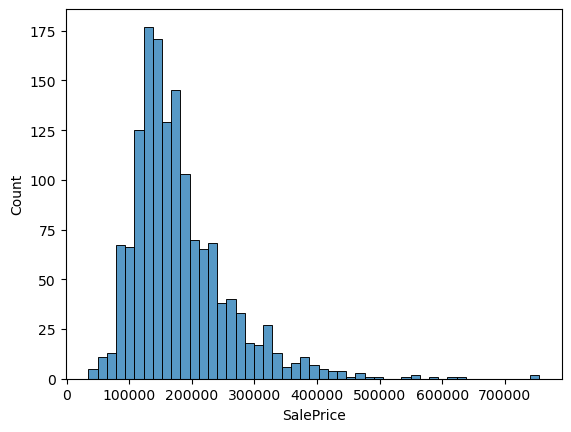

In [26]:


#Plot my sale price
x = house_train['SalePrice']
sns.histplot(x, kde=False)


In [27]:


#splitting train data as conctenated in the begining
house_train1 = house_data1[:house_train.shape[0]]
#splitting test data as conctenated in the begining
house_test1 = house_data1[house_train.shape[0]:]


In [57]:


#Smooting the values. As the sale price is big
house_train['log_sale_price'] = np.log(house_train['SalePrice'])


In [58]:
house_train['log_sale_price'] 

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: log_sale_price, Length: 1460, dtype: float64

In [59]:
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_sale_price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,12.072541
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,12.254863
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,12.493130
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,11.864462


<Axes: xlabel='log_sale_price', ylabel='Count'>

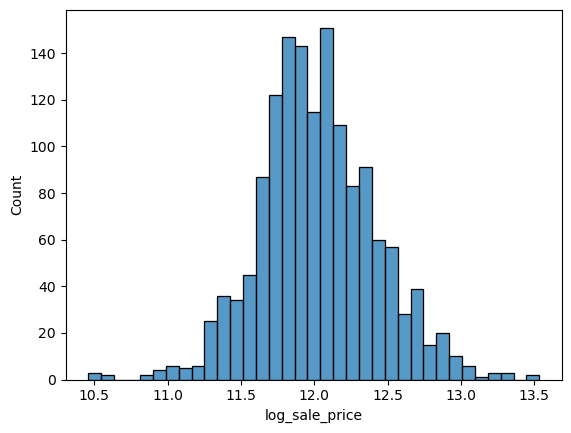

In [29]:

#See how the data looks like with log values.
x=house_train['log_sale_price']
sns.histplot(x,kde=False)

In [30]:

X_train = house_train1
y_train = house_train['SalePrice']
X_train


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,4,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
1,9600,6,8,1976,1976,3,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
2,11250,7,5,2001,2002,4,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
3,9550,7,5,1915,1970,3,3,3,4,4,...,1,0,0,1,1,0,0,0,0,0
4,14260,8,5,2000,2000,4,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,3,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
1456,13175,6,6,1978,1988,3,3,4,3,3,...,1,0,0,1,0,0,0,0,1,0
1457,9042,7,9,1941,2006,5,4,3,4,5,...,1,0,0,1,0,0,0,0,1,0
1458,9717,5,6,1950,1996,3,3,3,3,4,...,1,0,0,1,0,0,0,0,1,0


In [31]:
dt_estimator = tree.DecisionTreeRegressor(random_state=2017)


In [32]:
def rmse(y_original,  y_pred):
   return math.sqrt(metrics.mean_squared_error(y_original, y_pred))
      
res = model_selection.cross_val_score(dt_estimator, X_train, y_train, cv=10, scoring=metrics.make_scorer(rmse)).mean()

dt_estimator.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2017)

In [33]:
X_test = house_test1
log_sales_price = dt_estimator.predict(X_test)
#convert log values back to orignal values by using exponential loss
#house_test['SalePrice'] = np.exp(log_sales_price)
house_test['SalePrice'] = log_sales_price
house_test.to_csv("submission_House.csv", columns=['Id','SalePrice'], index=False)

In [34]:
X_train

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,4,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
1,9600,6,8,1976,1976,3,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
2,11250,7,5,2001,2002,4,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
3,9550,7,5,1915,1970,3,3,3,4,4,...,1,0,0,1,1,0,0,0,0,0
4,14260,8,5,2000,2000,4,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,3,3,4,3,5,...,1,0,0,1,0,0,0,0,1,0
1456,13175,6,6,1978,1988,3,3,4,3,3,...,1,0,0,1,0,0,0,0,1,0
1457,9042,7,9,1941,2006,5,4,3,4,5,...,1,0,0,1,0,0,0,0,1,0
1458,9717,5,6,1950,1996,3,3,3,3,4,...,1,0,0,1,0,0,0,0,1,0
